<a href="https://colab.research.google.com/github/juancas9812/Inteligencia-Artificial-2020-3/blob/master/Tarea_Datasets_y_clasificadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pontificia Universidad Javeriana
# Inteligencia Artificial 2020-30
Tarea Uso de datasets y Selección de metodo de clasficación

Juan Camilo Sarmiento Peñuela


Enunciado:

Usando uno de los dos datasets:

https://www.kaggle.com/c/titanic

https://www.kaggle.com/renanmav/which-team-will-win-this-dota-2-match

Implemente el que usted considere sea el mejor clasificador conveniente a partir de los vistos en clase. (LR, SVM todas sus versiones, KNN en todas sus versiones) 


La entrega DEBE tener conclusiones que expliquen paso a paso su procedimiento.

1. Como pre procesa los datos,

2. Como segmenta los datos y etiquetas en validacion y entrenamiento,

3. Como selecciona los hiperparámetros del método.

4. Como evalua su método definitivo a partir de una de las métricas vistas en clase de desempeño (ACC, F1, MCC), y por que selecciona esta por sobre las otras.

Use el conjunto de training suministrado para validar también, si usted somete su clasificador a kaggle como parte del concurso (usando el conjunto de validación suministrado por la página), se asignarán créditos extra, haga una captura de pantalla con los resultados de su sometimiento.

# Pre procesamiento de los datos

El primer paso para realizar el modelo es conocer el dataset y analizar cómo son sus datos para poder después construir el modelo para el clasificador.

Se escoge el dataset de Titanic, el cual contiene 2 archivos .csv, uno para entrenamiento y otro para hacer test. Este último no tiene la etiqueta de "survival", ya que según se describe en Kaggle, se utiliza para evaluar nuevos datos en el clasificador.

Para importar los datos y visualizarlos para poder procesarlos se importa la libreria pandas y algunos de sus módulos, al igual que algunas librerías para visualizar y presentar los datos como matplotlib y seaborn:


In [ ]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

Ya que se importó pandas, se puede importar/leer los datos:

In [ ]:
titanic_train = pd.read_csv("train.csv") #Carga el archivo de entrenamiento
titanic_test  = pd.read_csv("test.csv") #Carga el archivo de evaluación

titanic_train.head()  #Se visualiza la cabeza de la tabla

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Luego de esto, se verifican los datos, en términos de su tipo y de los "NULL counts":

In [ ]:
titanic_train.info()
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

Como se observa, se tienen 891 entradas (filas) con diferentes tipos de datos, ya que se cuentan con datos que marca como "object", que son cadenas de caracteres, como pueden ser los nombres o los códigos de los tiquetes. 

Al observar la cuenta, se aprecia que en algunas columnas hacen falta datos, como sucede con la edad, la cabina y el embarque. Posteriormente, se completarán o eliminarán filas o columnas dependiendo del dato. Por el momento, sirve observar un poco más la información que se tiene para no borrar información necesaria, o para no generar ruido con datos que están equivocados y se introducen en el dataset.



Primero, se observan las tendencias de los datos numéricos:

In [ ]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Para poder realizar observaciones más puntuales sobre los datos tanto numéricos como categóricos, se separan los datos y se verifican las distribuciones, correlaciones, etc.

In [ ]:
d_num=titanic_train[['Age','SibSp','Parch','Fare']]
d_cat=titanic_train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

Se visualizan los datos numéricos:

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


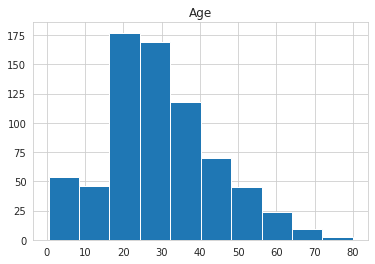

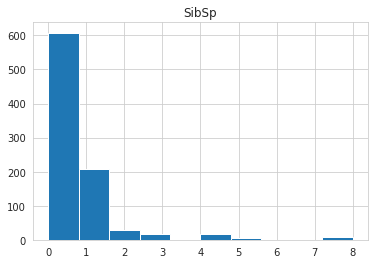

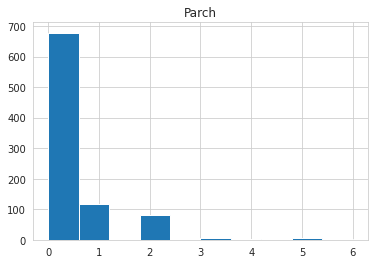

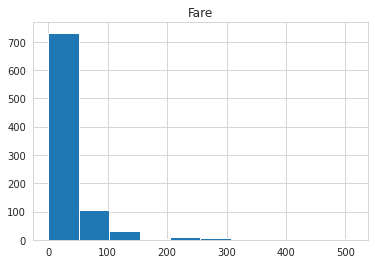

In [ ]:
for i in d_num.columns:
  plt.hist(d_num[i])
  plt.title(i)
  plt.show()

Ahora se observa la correlación entre esos datos:

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


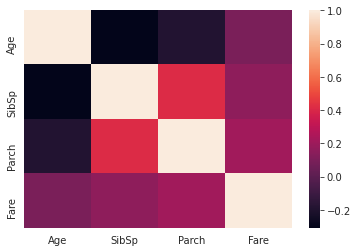

In [ ]:
print(d_num.corr())
sns.heatmap(d_num.corr())

Por el momento, se observa que los datos no están altamente correlacionados, e incluso hay valores negativos de correlación. Adicionalmente, se hace una comparación entre los sobrevivientes a partir de los datos numéricos, ya que esto puede ser importante a la hora de contruir el modelo:

In [ ]:
pd.pivot_table(titanic_train, index='Survived',values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


Para hacer observaciones de los datos categóricos, se hacen graficos de barras para entender como se dividen las categorias/clases de estos datos

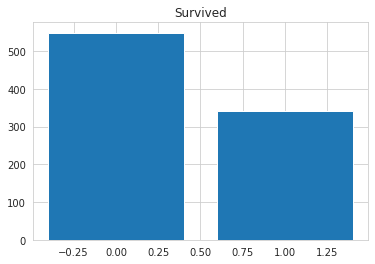

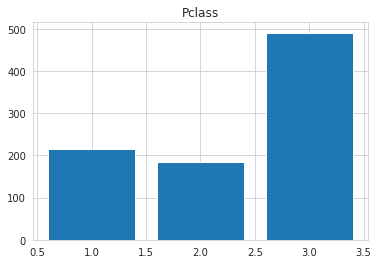

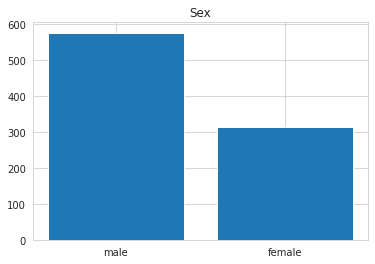

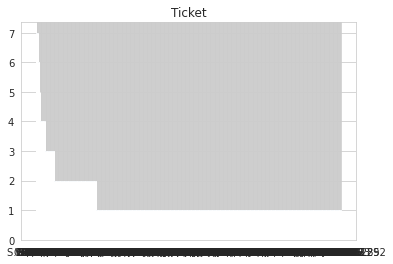

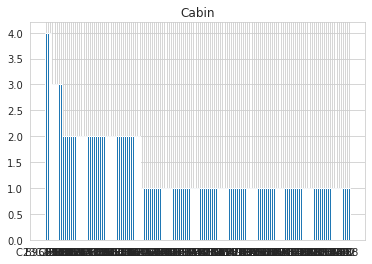

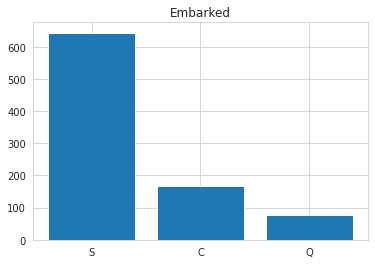

In [ ]:
for i in d_cat.columns:
  plt.bar(d_cat[i].value_counts().index,d_cat[i].value_counts())
  plt.title(i)
  plt.show()

Se hace un analisis similar al de los datos numericos, pues se debe al final clasificar si las personas sobreviven o no, dado esto se hacen tablas dependiendo de las categorías:

In [ ]:
pd.pivot_table(titanic_train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [ ]:
pd.pivot_table(titanic_train, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [ ]:
pd.pivot_table(titanic_train, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


De estas tablas, se podría concluir que la clase del pasajero y el sexo de las personas puede llegar a influir en el resultado.

Ya que se conoce un poco más el dataset, se pueden realizar las conversiones de las variables categóricas, y se puede llenar la tabla con los datos que faltan, o borrar columnas que no son necesarias o que debido a que faltan datos no sirven para entrenar o evaluar.

Primero, del conteo del lugar de embarcación, hacen falta 2 datos, y del analisis que se hizo, se podrían suprimir esas 2 entradas que no tienen el dato de embarcación:

In [ ]:
titanic_train.dropna(subset=['Embarked'],inplace = True)

Por otro lado, otros dato que está "incompleto" y el cual puede considerarse necesario, ya que puede llegar a influir bastante en el resultado de la clasificación es la edad. Para no tener tanto error en el resultado, se rellenan los campos faltantes con la media o la mediana de los datos existentes, para no alterar mucho la distribución de los datos.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


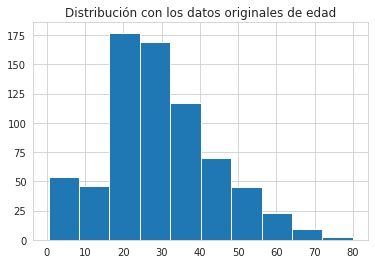

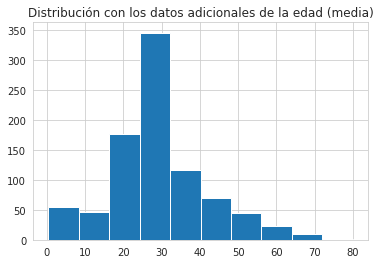

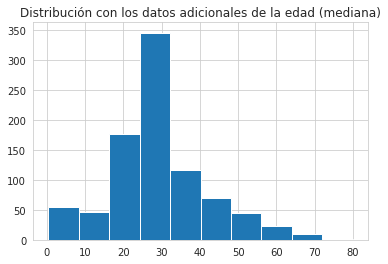

In [ ]:
plt.hist(titanic_train.Age)
plt.title('Distribución con los datos originales de edad')
plt.show()

train_copy1=titanic_train.copy()
train_copy2=titanic_train.copy()

train_copy1.Age = train_copy1.Age.fillna(train_copy1.Age.mean())
plt.hist(train_copy1.Age)
plt.title('Distribución con los datos adicionales de la edad (media)')
plt.show()

train_copy2.Age = train_copy2.Age.fillna(train_copy2.Age.median())
plt.hist(train_copy2.Age)
plt.title('Distribución con los datos adicionales de la edad (mediana)')
plt.show()




De la prueba realizada entre llenar los datos de edad y la tarifa con la media y la mediana, se observan que los resultados son similares si no iguales. Adicionalmente, los datos de la tarifa se pueden normalizar para que se de una mejor distribución de los datos.

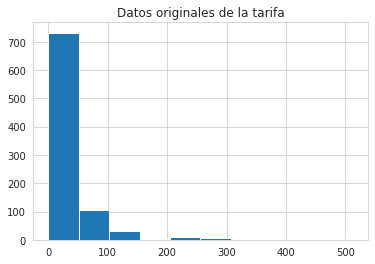

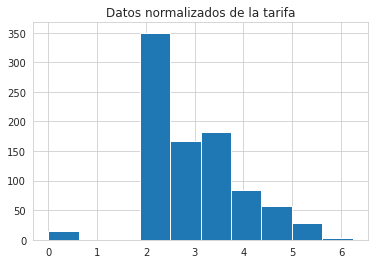

In [ ]:
#Se hace el cambio definitivo para llenar los datos de edad
titanic_train.Age = titanic_train.Age.fillna(titanic_train.Age.mean())
titanic_test.Age = titanic_test.Age.fillna(titanic_train.Age.mean())

train_copy1['norm_fare'] = np.log(train_copy1.Fare + 1) #Se hace la normalización
#Se muestra la diferencia entre la tarifa normalizada y la original para posteriormente hacer el cambio
plt.hist(train_copy2.Fare)
plt.title('Datos originales de la tarifa')
plt.show()
plt.hist(train_copy1.norm_fare)
plt.title('Datos normalizados de la tarifa')
plt.show()



Luego de normalizar los datos de la tarifa, se realiza la conversión y escalización de los datos, tanto de entrenamiento como de evaluación, para lo cual se adecuan algunos datos como el nombre, ya que esto puede influir en el la clasificación.

In [ ]:
#Se obtiene una nueva columna a partir de los titulos de nombre
#titanic_train['name_title'] = titanic_train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
#titanic_test['name_title'] = titanic_test.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#Se realiza la normalización de los datos de la tarifa
titanic_train['norm_fare'] = np.log(titanic_train.Fare+1)

#Para los datos de test, del conteo se tiene que hace falta 1 dato para tarifa, por eso se llena con la media aunque pueda ser ruido
#titanic_test.Fare=titanic_test.fillna(titanic_test.Fare.mean().astype(dtype="float64"))

#También se realiza la normalización para los datos de test
titanic_test.Fare = titanic_test.Fare.apply(lambda x: titanic_test.Fare.mean() if x==0 else x)
titanic_test['norm_fare'] = np.log(1 + titanic_test.Fare)


#Se convierte a str los datos de la clase del pasajero, ya que esa variable es categórica y no numérica
titanic_train.Pclass=titanic_train.Pclass.astype(str)
titanic_test.Pclass=titanic_test.Pclass.astype(str)

#train_dummies=pd.get_dummies(titanic_train[['Pclass','Sex','Age','norm_fare','Embarked','name_title']])
#test_dummies=pd.get_dummies(titanic_test[['Pclass','Sex','Age','norm_fare','Embarked','name_title']])

In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    object 
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
 12  name_title   889 non-null    object 
 13  norm_fare    889 non-null    float64
dtypes: float64(3), int64(4), object(7)
memory usage: 104.2+ KB


In [ ]:
train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      889 non-null    float64
 1   norm_fare                889 non-null    float64
 2   Pclass_1                 889 non-null    uint8  
 3   Pclass_2                 889 non-null    uint8  
 4   Pclass_3                 889 non-null    uint8  
 5   Sex_female               889 non-null    uint8  
 6   Sex_male                 889 non-null    uint8  
 7   Embarked_C               889 non-null    uint8  
 8   Embarked_Q               889 non-null    uint8  
 9   Embarked_S               889 non-null    uint8  
 10  name_title_Capt          889 non-null    uint8  
 11  name_title_Col           889 non-null    uint8  
 12  name_title_Don           889 non-null    uint8  
 13  name_title_Dr            889 non-null    uint8  
 14  name_title_Jonkheer      8

In [ ]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    object 
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  norm_fare    417 non-null    float64
dtypes: float64(3), int64(3), object(6)
memory usage: 39.3+ KB


In [ ]:
test_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                418 non-null    float64
 1   norm_fare          417 non-null    float64
 2   Pclass_1           418 non-null    uint8  
 3   Pclass_2           418 non-null    uint8  
 4   Pclass_3           418 non-null    uint8  
 5   Sex_female         418 non-null    uint8  
 6   Sex_male           418 non-null    uint8  
 7   Embarked_C         418 non-null    uint8  
 8   Embarked_Q         418 non-null    uint8  
 9   Embarked_S         418 non-null    uint8  
 10  name_title_Col     418 non-null    uint8  
 11  name_title_Dona    418 non-null    uint8  
 12  name_title_Dr      418 non-null    uint8  
 13  name_title_Master  418 non-null    uint8  
 14  name_title_Miss    418 non-null    uint8  
 15  name_title_Mr      418 non-null    uint8  
 16  name_title_Mrs     418 non

Al usar pd.dummies, se obtienen columnas con binarios dependiendo de las separaciones para las clases hechas. Como se observa, ya no se cuenta con los 2 datos que faltaban por el embarque en el conjunto de entrenamiento, pero los titulos de los nombres cambian dentro de los 2 conjuntos de datos. Por esto, se juntan los datos para que tengan las mismas separaciones, y luego se separan.(Se deben correr otra vez los cuadros de arriba, comentariando la parte de pd.dummies)

In [ ]:
titanic_train['train_test']=1
titanic_test['train_test']=0
titanic_test['Survived']=np.NaN

all_data=pd.concat([titanic_train,titanic_test])

In [ ]:
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','name_title','train_test']])

#Se dividen los conjuntos originales
X_train_1 = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test_1 = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)

y_train_1 = all_data[all_data.train_test==1].Survived
y_train_1.shape

(889,)

##Segmentación de los datos y última parte del pre-procesamiento

Se segmentan los datos en 75-25,70-30 y 80-20 para el entrenemiento y la validación y se realiza la escalización para el conjunto de entrenamiento. Posteriormente, con los datos de test, se evaluan para subirlos a kaggle.

In [220]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_1, y_train_1, random_state=0,test_size=0.3)


scaler = StandardScaler()
scaler.fit(X_train) #Se hace el fit de los datos de entrenamiento
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [221]:
X_train.shape

(622, 30)

In [222]:
X_test.shape

(267, 30)

In [223]:
y_train.shape

(622,)

In [224]:
y_test.shape

(267,)

# Selección del clasificador e hiperparametros
Con los datos segmentados, se ha escogido el clasificador de máquina de soporte vectorial (SVM).

Los hiperparámetros que se pueden cambiar son C y el valor de gamma. Se encuentra en algunas fuentes que

0.0001 < gamma < 10 y que 0.1 < c < 100

y de acuerdo al valor de estos de da mayor overfitting, cuando se aumenta gamma y el margen de la clasificación se vuelve más pequeño con c aumentando.

In [ ]:
from sklearn import svm

msv = svm.SVC(C=500,kernel='rbf',gamma=10)

msv.fit(X_train, y_train)

SVC(C=500, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
msv0 = svm.SVC(C=50,kernel='rbf', gamma=5)
msv0.fit(X_train,y_train)

SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
msv1 = svm.SVC(C=100,kernel='rbf', gamma=5)
msv1.fit(X_train,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

## Desempeño

Al haber entrenado el modelo de svm, se hace el test o validación, y se obtienen las métricas de desempeño con los scores de f1, accuracy y MCC.

caso1:
matthews_corrcoef 0.3552587153228806
f1 0.5
Accuracy 0.6928838951310862


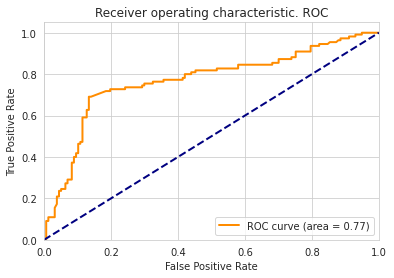

In [225]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score


print("caso1:")
y_test_predicted = msv.predict(X_test)
y_test_scores = msv.decision_function(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted)
f1 = f1_score(y_test, y_test_predicted)
print("matthews_corrcoef", MCC)
print("f1",f1)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)

fpr,tpr,thresholds = roc_curve(y_test, y_test_scores)
roc_auc=roc_auc_score(y_test, y_test_scores)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic. ROC')
plt.legend(loc="lower right")
plt.show()


caso2:
matthews_corrcoef 0.4466521760577768
f1 0.6785714285714286
Accuracy 0.7303370786516854


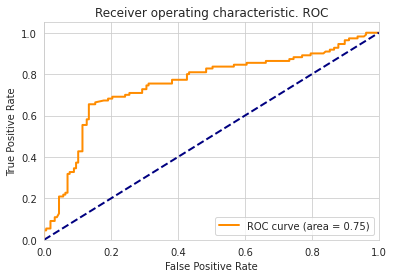

In [226]:
##Segundo caso con C=50 y gamma=5
print("caso2:")
y_test_predicted0 = msv0.predict(X_test)
y_test_scores0 = msv0.decision_function(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted0)
f1 = f1_score(y_test, y_test_predicted0)
print("matthews_corrcoef", MCC)
print("f1",f1)
ACC = accuracy_score(y_test, y_test_predicted0)
print("Accuracy", ACC)

fpr,tpr,thresholds = roc_curve(y_test, y_test_scores0)
roc_auc=roc_auc_score(y_test, y_test_scores0)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic. ROC')
plt.legend(loc="lower right")
plt.show()



caso3:
matthews_corrcoef 0.3494277580447848
f1 0.5340909090909091
Accuracy 0.6928838951310862


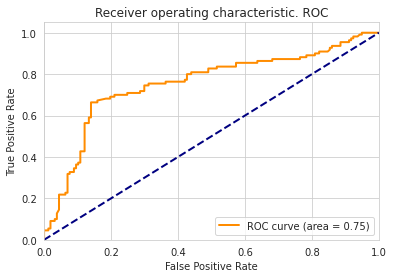

In [227]:
#Tercer caso con C=100 y gamma = 5
print("caso3:")
y_test_predicted1 = msv1.predict(X_test)
y_test_scores1 = msv1.decision_function(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted1)
f1 = f1_score(y_test, y_test_predicted1)
print("matthews_corrcoef", MCC)
print("f1",f1)
ACC = accuracy_score(y_test, y_test_predicted1)
print("Accuracy", ACC)

fpr,tpr,thresholds = roc_curve(y_test, y_test_scores1)
roc_auc=roc_auc_score(y_test, y_test_scores1)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic. ROC')
plt.legend(loc="lower right")
plt.show()

En cuanto a la pregunta de cuál metrica utilizar, la respuesta podría ser usar el f1, ya que este tiene en cuenta los falsos positivos y los falsos negativos. Dado esto, junto con el MCC, se puede observar que el clasificador obtuvo un resultado un poco regular, ya que se llega alrededor del 70% y el coeficiente de correlación de mathews es de alrededor de 0.5.

#Conclusiones

A partir del trabajo realizado, se encuentra que verificar cuáles son los datos del dataset y verificar su comportamiento es un paso supremamente importante antes de realizar los modelos.

Se concluye que puede que algunos datos que no se utilizaron podrían haber cambiado el resultado del clasificador, asi mismo, algunos datos que se incluyeron pueden no haber contribuido con la clasificación como son los titulos asociados a las personas, ya que el resultado esperado, a partir de los resultados encontrados en internet, son al rededor del 80% de acierto, y el resultado que se obtuvo fue cercano al 70% en el mejor caso.

Se encuentra que la segmentación también juega un papel importante a la hora de construir el clasificador, ya que se encuentran resultados distintos para cada uno, dando la segmentación de 70-30 el mejor resultado de las tres segmentaciones realizadas. 


#Resultados en Kaggle

In [ ]:
y_test_1 = all_data[all_data.train_test==0].Survived
y_test_1.shape

(418,)

In [ ]:
X_test_1.shape

(418, 30)

In [ ]:
titanic_test.Fare = titanic_test.Fare.apply(lambda x: titanic_test.Fare.mean() if x==0 else x)
X_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      418 non-null    float64
 1   SibSp                    418 non-null    int64  
 2   Parch                    418 non-null    int64  
 3   norm_fare                417 non-null    float64
 4   Pclass_1                 418 non-null    uint8  
 5   Pclass_2                 418 non-null    uint8  
 6   Pclass_3                 418 non-null    uint8  
 7   Sex_female               418 non-null    uint8  
 8   Sex_male                 418 non-null    uint8  
 9   Embarked_C               418 non-null    uint8  
 10  Embarked_Q               418 non-null    uint8  
 11  Embarked_S               418 non-null    uint8  
 12  name_title_Capt          418 non-null    uint8  
 13  name_title_Col           418 non-null    uint8  
 14  name_title_Don           4

In [ ]:
y_predicted_kaggle = msv1.predict(X_test_1)

ValueError: ignored

No se pudo obtener la clasificación para el conjunto de datos del archivo test.csv, debido a que hace falta un dato de la tarifa y existe un error al intentar completar el dato.